In [1]:
#importando dados de focos de incêndios em 2024 do BD-Queimadas 
#período dos dados: 01/01/2024 a 10/09/2024

import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

bd_2024 = pd.read_csv('focos_qmd_inpe_2024-01-01_2024-09-10_13.231475.csv')

bd_2024['geometry'] = bd_2024.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
focos_2024 = gpd.GeoDataFrame(bd_2024, geometry='geometry')
focos_2024.set_crs(epsg=4326, inplace=True)

focos_2024


,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,geometry
0,2024/01/02 17:09:00,AQUA_M-T,Brasil,AMAPÁ,AMAPÁ,Amazônia,3.0,0.00,0.17,1.35055,-50.46292,7.4,POINT (-50.46292 1.35055)
1,2024/01/02 17:09:00,AQUA_M-T,Brasil,PARÁ,SÃO DOMINGOS DO CAPIM,Amazônia,2.0,8.95,0.00,-1.96225,-47.60220,10.4,POINT (-47.6022 -1.96225)
2,2024/01/02 17:06:00,AQUA_M-T,Brasil,MATO GROSSO,RIBEIRÃO CASCALHEIRA,Amazônia,0.0,6.50,0.00,-12.55977,-51.95650,23.9,POINT (-51.9565 -12.55977)
3,2024/01/02 17:09:00,AQUA_M-T,Brasil,PARÁ,MÃE DO RIO,Amazônia,2.0,8.23,0.00,-1.96096,-47.59327,10.1,POINT (-47.59327 -1.96096)
4,2024/01/02 18:45:00,AQUA_M-T,Brasil,AMAZONAS,LÁBREA,Amazônia,0.0,0.00,0.00,-9.02243,-65.69524,15.1,POINT (-65.69524 -9.02243)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82595,2024/09/10 17:05:00,AQUA_M-T,Brasil,PARÁ,PORTEL,Amazônia,NaN,NaN,NaN,-3.15679,-50.84431,42.6,POINT (-50.84431 -3.15679)
82596,2024/09/10 17:05:00,AQUA_M-T,Brasil,PARÁ,PORTEL,Amazônia,NaN,NaN,NaN,-2.34146,-50.63033,106.5,POINT (-50.63033 -2.34146)
82597,2024/09/10 17:05:00,AQUA_M-T,Brasil,PARÁ,PORTEL,Amazônia,NaN,NaN,NaN,-3.09519,-50.57895,77.6,POINT (-50.57895 -3.09519)
82598,2024/09/10 17:05:00,AQUA_M-T,Brasil,PARÁ,PORTEL,Amazônia,NaN,NaN,NaN,-2.33355,-50.63593,66.1,POINT (-50.63593 -2.33355)


In [2]:
#dados históricos importados da BasedosDados

from shapely import wkt

# Load the CSV file into a DataFrame
amazonia = pd.read_csv('focos_amazona_2003_2023.csv')

amazonia['centroide'] = amazonia['centroide'].apply(wkt.loads)

# Criar um GeoDataFrame
focos_serie = gpd.GeoDataFrame(amazonia, geometry='centroide')
# Definir o sistema de coordenadas (WGS84: EPSG 4326)
focos_serie.set_crs(epsg=4326, inplace=True)
focos_serie.rename(columns={'data_hora': 'DataHora'}, inplace=True)

focos_serie

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16368\800216785.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  amazonia = pd.read_csv(r'C:\Users\Usuario\Documents\Python Scripts\Queimadas\focos_amazona_2003_2023.csv')


,ano,sigla_uf,id_municipio,id_municipio_nome,bioma,id_bdq,id_foco,DataHora,centroide
0,2003,RO,1101492,São Francisco do Guaporé,Amazônia,13000991,876cbdb7-5aba-11e8-911c-28924ad12c5c,2003-09-23 17:38:00,POINT (-63.654 -11.928)
1,2003,MT,5107776,Santa Terezinha,Amazônia,14680275,878903c2-5aba-11e8-911c-28924ad12c5c,2003-12-20 16:49:00,POINT (-50.619 -10.023)
2,2003,MT,5107776,Santa Terezinha,Amazônia,12525856,8761b2b8-5aba-11e8-911c-28924ad12c5c,2003-09-08 16:43:00,POINT (-50.414 -9.965)
3,2003,MT,5107776,Santa Terezinha,Amazônia,13043721,876e745a-5aba-11e8-911c-28924ad12c5c,2003-09-24 16:43:00,POINT (-50.64 -10.039)
4,2003,MT,5107776,Santa Terezinha,Amazônia,12256319,875b8c1c-5aba-11e8-911c-28924ad12c5c,2003-09-01 16:36:00,POINT (-50.636 -9.818)
...,...,...,...,...,...,...,...,...,...
2394631,2023,AMAZONAS,-8,BERURI,Amazônia,-4,-2,2023-08-22 18:11:00,POINT (-61.36406 -3.86139)
2394632,2023,AMAZONAS,-8,MANACAPURU,Amazônia,-4,-2,2023-08-22 18:11:00,POINT (-61.01009 -3.74811)
2394633,2023,AMAZONAS,-8,MANAQUIRI,Amazônia,-4,-2,2023-08-22 18:11:00,POINT (-60.60017 -3.70675)
2394634,2023,MATO GROSSO,-8,ARIPUANÃ,Amazônia,-4,-2,2023-08-22 18:09:00,POINT (-60.11608 -9.86731)


In [3]:
focos_2024['DataHora'] = pd.to_datetime(focos_2024['DataHora'], format='%Y/%m/%d %H:%M:%S')
julho = pd.Timestamp('2024-07-01')

filtro = focos_2024[focos_2024['DataHora'] >= julho]


estado_analise = filtro.groupby('Estado').agg(
    quantidade_focos=('FRP', 'count'),
).sort_values(by='quantidade_focos', ascending=False)


estado_analise



,quantidade_focos
Estado,
PARÁ,26303
AMAZONAS,16664
MATO GROSSO,14020
RONDÔNIA,7066
ACRE,3637
MARANHÃO,858
TOCANTINS,461
RORAIMA,68
AMAPÁ,34


In [4]:
municipio_analise = filtro.groupby(['Municipio', 'Estado']).agg(
    quantidade_focos=('FRP', 'count'),
).sort_values(by='quantidade_focos', ascending=False)

municipio_analise.head(20)


,,quantidade_focos
Municipio,Estado,
SÃO FÉLIX DO XINGU,PARÁ,5146
ALTAMIRA,PARÁ,4412
NOVO PROGRESSO,PARÁ,4276
APUÍ,AMAZONAS,4048
LÁBREA,AMAZONAS,3230
ITAITUBA,PARÁ,2620
PORTO VELHO,RONDÔNIA,2317
COLNIZA,MATO GROSSO,2054
NOVO ARIPUANÃ,AMAZONAS,1826


In [5]:
ranking_mun = municipio_analise.head(20)
ranking_mun.to_csv('rankin_mun.csv')

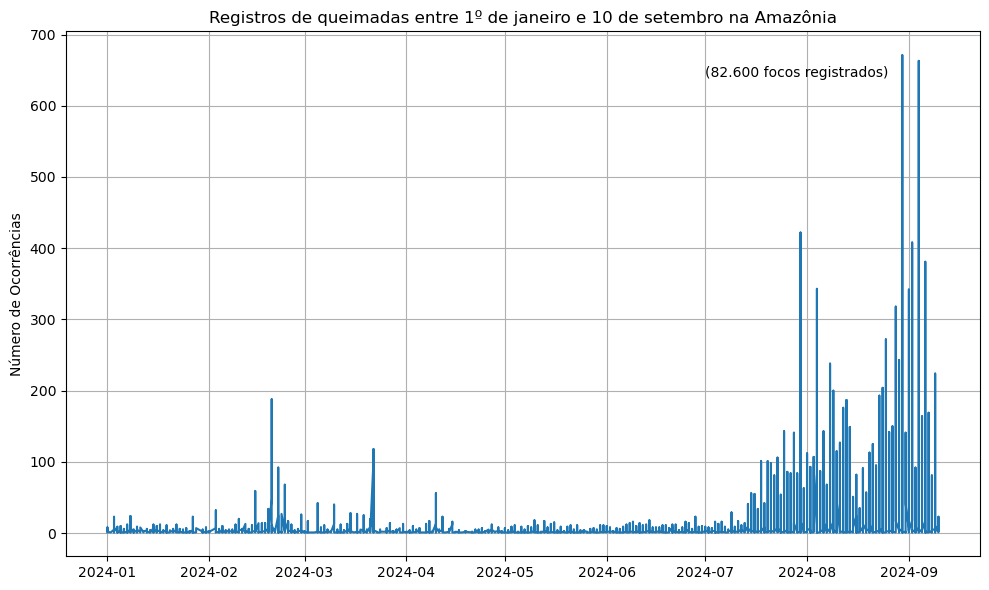

In [6]:
import matplotlib.pyplot as plt
focos_2024['DataHora'] = pd.to_datetime(focos_2024['DataHora'], format='%Y/%m/%d %H:%M:%S')

geo_df_mes = focos_2024.groupby([focos_2024['DataHora'].dt.date, 'Municipio']).agg(
    quantidade_focos=('FRP', 'count')
).reset_index()

plt.figure(figsize=(10, 6))

# Plotando a quantidade de focos de incêndio por dia
plt.plot(geo_df_mes['DataHora'], geo_df_mes['quantidade_focos'], marker='')

plt.title('Registros de queimadas entre 1º de janeiro e 10 de setembro na Amazônia')
plt.text(0.8, 0.92, '(82.600 focos registrados)', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.ylabel('Número de Ocorrências')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
focos_serie['DataHora'] = pd.to_datetime(focos_serie['DataHora'], errors='coerce')
focos_2024['DataHora'] = pd.to_datetime(focos_2024['DataHora'], errors='coerce')

focos_serie['id_municipio_nome'] = focos_serie['id_municipio_nome'].str.upper()
focos_2024['Municipio'] = focos_2024['Municipio'].str.upper()

start_date = '07-01'
end_date = '09-10'

mask_focos_serie = (focos_serie['DataHora'].dt.strftime('%m-%d') >= start_date) & (focos_serie['DataHora'].dt.strftime('%m-%d') <= end_date)
focos_serie_filtered = focos_serie[mask_focos_serie]

mask_focos_2024 = (focos_2024['DataHora'].dt.strftime('%m-%d') >= start_date) & (focos_2024['DataHora'].dt.strftime('%m-%d') <= end_date)
focos_2024_filtered = focos_2024[mask_focos_2024]

focos_serie_mn_ano = focos_serie_filtered.groupby([focos_serie_filtered['DataHora'].dt.year, 'id_municipio_nome']).agg(quantidade_focos=('id_foco', 'count')).reset_index()

focos_2024_mn_ano = focos_2024_filtered.groupby([focos_2024_filtered['DataHora'].dt.year, 'Municipio']).agg(quantidade_focos=('FRP', 'count')).reset_index()

focos_serie_mn_ano.rename(columns={'id_municipio_nome': 'Municipio'}, inplace=True)

mun_total = pd.concat([focos_serie_mn_ano, focos_2024_mn_ano], ignore_index=True)

mun_total


,DataHora,Municipio,quantidade_focos
0,2003,ABAETETUBA,42
1,2003,ABEL FIGUEIREDO,14
2,2003,ACARÁ,143
3,2003,ACRELÂNDIA,369
4,2003,AFUÁ,1
...,...,...,...
10090,2024,XAPURI,70
10091,2024,XINGUARA,28
10092,2024,ZÉ DOCA,3
10093,2024,ÁGUA AZUL DO NORTE,174


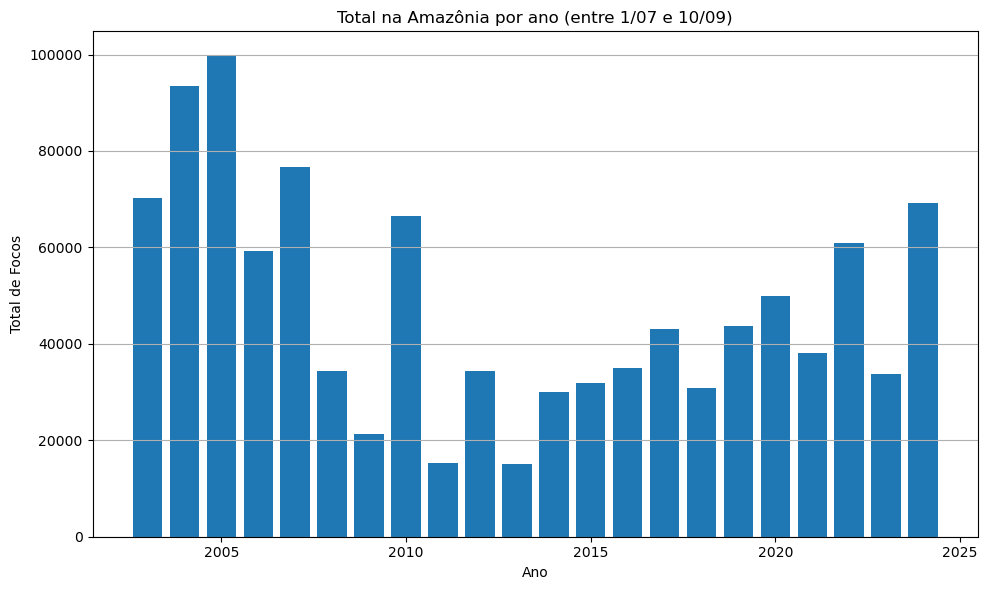

In [8]:
mun_anos = mun_total.groupby('DataHora')['quantidade_focos'].sum().reset_index()

# Plotting a bar graph to visualize the total fire occurrences over the years
plt.figure(figsize=(10, 6))
plt.bar(mun_anos['DataHora'], mun_anos['quantidade_focos'])
plt.title('Total na Amazônia por ano (entre 1/07 e 10/09)')
plt.xlabel('Ano')
plt.ylabel('Total de Focos')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [9]:
mun_anos

,DataHora,quantidade_focos
0,2003,70201
1,2004,93433
2,2005,99815
3,2006,59254
4,2007,76733
5,2008,34311
6,2009,21402
7,2010,66535
8,2011,15292
9,2012,34308


In [10]:
mun_total.to_csv('focos_mn_periodo_hist.csv')
